# Analysis of Gen 2 DVs

## Imports

In [1]:
from main import get_data_base, genders_male_th

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from functools import partial

## Loading DB

In [2]:
table = get_data_base()

In [3]:
table

,DVs,Attackb,Defenseb,Speedb,Specialb,Attack,Defense,Speed,Special,HPb,...,Y,HP_BP,HP_Type,Shiny,0:1,1:7,1:3,1:1,3:1,1:0
0,0,0,0,0,0,0,0,0,0,0,...,0,31,Fighting,False,♂,♀,♀,♀,♀,♀
1,1,0,0,0,1,0,0,0,1,1,...,1,31,Fighting,False,♂,♀,♀,♀,♀,♀
2,10,0,0,0,10,0,0,0,2,0,...,2,32,Fighting,False,♂,♀,♀,♀,♀,♀
3,11,0,0,0,11,0,0,0,3,1,...,3,32,Fighting,False,♂,♀,♀,♀,♀,♀
4,100,0,0,0,100,0,0,0,4,0,...,3,32,Fighting,False,♂,♀,♀,♀,♀,♀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,1111111111111011,1111,1111,1111,1011,15,15,15,11,1111,...,3,70,Dark,False,♂,♂,♂,♂,♂,♀
65532,1111111111111100,1111,1111,1111,1100,15,15,15,12,1110,...,3,70,Dark,False,♂,♂,♂,♂,♂,♀
65533,1111111111111101,1111,1111,1111,1101,15,15,15,13,1111,...,3,70,Dark,False,♂,♂,♂,♂,♂,♀
65534,1111111111111110,1111,1111,1111,1110,15,15,15,14,1110,...,3,70,Dark,False,♂,♂,♂,♂,♂,♀


## A little bit on Shininess
The shiny property is determine by the DVs, so with this DB we can perform some related statistics

### Getting the probability
For this, we need to just take the mean over the Shiny column

In [4]:
table["Shiny"].mean()

0.0001220703125

### Now the frequency

In [5]:
1 / table["Shiny"].mean()

8192.0

In [6]:
2 ** (13)

8192

In [7]:
table["Shiny"].sum()

8

In [8]:
2 ** 3

8

In [9]:
np.log(len(table)) / np.log(2)

16.0

In [10]:
2 ** (16 - 3)

8192

So, in average, every 8192 randomly generated pokémon 1 should be shiny.

This is not the same as the probability to find at least one shiny in the 8192th encounter. To compute this, is very useful to use the theorem of total probability, since find at least one shiny is the complement of not finding any $1 - p_{shiny}$.

If we try $8192$ times, then is just a Bernoulli experiment, so to not find any shiny in those encounters would be the product if such probability that amount of times, $\left(1 - p_{shiny}\right)^{8192}$ 

Now we need to calculate the complement and is done

$$1 - \left(1 - p_{shiny}\right)^{8192} = 1 - \left(1 - \frac{1}{8192}\right)^{8192} = 63.214\%$$

In [11]:
1 - (1 - 1 / 8192) ** 8192

0.6321430135498485

### How unlicky am I?
In this section I just calculated the approximatly amount of encounters to get a specific probability of getting at least one shiny, so if you have done more than 37724 and have not find a shiny yet, you are unlucky (this is less than 1% likely).

<ins>**Note**</ins>: I'm not saying that after 10000, 20000, or whatever number of encounters you've already done your probability to get a shiny in the next encounter it is going to be higher, the probability is the same in every encounter!
Assuming that would be a case of the Gambler's fallacy (https://en.wikipedia.org/wiki/Gambler%27s_fallacy), I'm just saying that in the big picture you are being unlucky.

$$ 1 - \left(1 - p_{shiny}\right) ^ n = p$$
$$ \left(1 - p_{shiny}\right) ^ n = 1 - p$$
$$ n \cdot log\left(1 - p_{shiny}\right) = log\left(1 - p\right)$$
$$ n = \frac{log\left(1 - p\right)}{log\left(1 - p_{shiny}\right)} $$


In [12]:
ps = np.array([0.5, 0.6321430135498485, 0.9, 0.95, 0.99, 0.999])
ns = np.log(1 - ps) / np.log(1 - 1 / 8192)
list(ns)

[5677.915122505303,
 8191.999999999998,
 18861.62576583619,
 24539.540888341482,
 37723.25153167237,
 56584.87729750855]

### Gender Ratio
Gender is also determine by DVs so maybe there is a relation with shininess, let's see...

Below I perform some statistics around gender ratio and shininess, and showing something well known by the comunity, that there is no female shinnies for pokémon with a gender ratio of 1:7
#### Absolute Frequency

In [13]:
table[table["Shiny"]][list(genders_male_th)].apply(pd.value_counts).fillna(0)

,0:1,1:7,1:3,1:1,3:1,1:0
♀,0.0,0.0,2,4,6,8.0
♂,8.0,8.0,6,4,2,0.0


#### Relative Frequency

In [14]:
table[table["Shiny"]][list(genders_male_th)].apply(partial(pd.value_counts, normalize=True)).fillna(0)

,0:1,1:7,1:3,1:1,3:1,1:0
♀,0.0,0.0,0.25,0.5,0.75,1.0
♂,1.0,1.0,0.75,0.5,0.25,0.0


Only the 1:7 ratio do not match with it's own shiny probability, even though there is 8 different DV cases for shiny pokémon, that clearly is divisible by 8

### About Hidden Power and other Stats
The type and the base power of Hidden Power is also determine by DVs and knowing that only 8 DVs are shiny and there is 16 different types, there are at least some types that are not mapped :(

In [15]:
pd.DataFrame(table[table["Shiny"]].groupby(["HP_BP", "HP_Type"])[["HP_BP", "HP_Type"]].value_counts())

0
HP_BP HP_Type   
50    Dragon   2
      Grass    2
70    Dragon   2
      Grass    2

Actually, a shiny pokémon only can have either Dragon or Grass HP Type with equal probability $P\left(\left.HP_{Type}=Grass\right|Shiny\right) = P\left(\left.HP_{Type}=Dragon\right|Shiny\right) = 1 / 2$

Looking in more detail we can confirm that shiny pokémon, specially the ones with HP type being Grass, have bad stats :/

In [16]:
table[table["Shiny"]].sort_values(["Attack"])[table.columns[:-7]]

,DVs,Attackb,Defenseb,Speedb,Specialb,Attack,Defense,Speed,Special,HPb,HP,Letter,X,Y,HP_BP,HP_Type
10922,10101010101010,10,1010,1010,1010,2,10,10,10,0,0,I,7,3,50,Grass
15018,11101010101010,11,1010,1010,1010,3,10,10,10,1000,8,I,7,3,50,Dragon
27306,110101010101010,110,1010,1010,1010,6,10,10,10,0,0,V,7,3,50,Grass
31402,111101010101010,111,1010,1010,1010,7,10,10,10,1000,8,V,7,3,50,Dragon
43690,1010101010101010,1010,1010,1010,1010,10,10,10,10,0,0,I,15,3,70,Grass
47786,1011101010101010,1011,1010,1010,1010,11,10,10,10,1000,8,I,15,3,70,Dragon
60074,1110101010101010,1110,1010,1010,1010,14,10,10,10,0,0,V,15,3,70,Grass
64170,1111101010101010,1111,1010,1010,1010,15,10,10,10,1000,8,V,15,3,70,Dragon


At least the Power Base of their HP is not that low, 70 it is the maximum value!

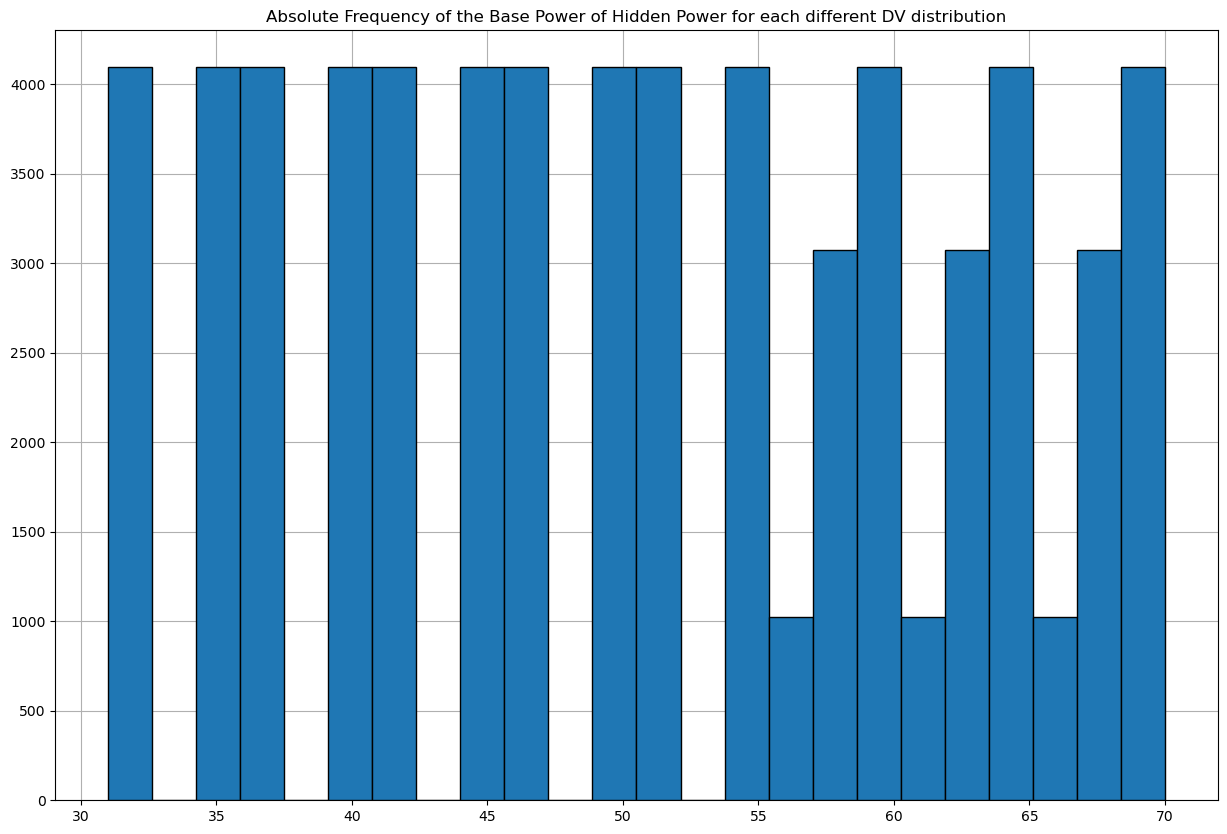

In [17]:
plt.figure(figsize=(15, 10))
plt.hist(table["HP_BP"], ec="black", zorder=3, bins=len(table["HP_BP"].unique()))
plt.title("Absolute Frequency of the Base Power of Hidden Power for each different DV distribution")
plt.grid(zorder=0)
plt.show()

It is evident that is not possible to get a perfect DV shiny pokémon, but which one is rarer?

To get a max Attack pokémon we need to encounter in average 16 different ones

In [18]:
1 / (table["Attack"]==15).mean()

16.0

And if we take into account Defense, Speed and the Special DVs?

In [19]:
1 / ((table["Attack"]==15) & (table["Defense"]==15) & (table["Speed"]==15) & (table["Special"]==15)).mean()

65536.0

Ouch! But make sense since only one row should be the perfect one

Wait! And HP?

In [20]:
1 / ((table["Attack"]==15) & (table["Defense"]==15) & (table["Speed"]==15) & (table["Special"]==15) & (table["HP"]==15)).mean()


65536.0

What? Why did not change? You may be confused, but HP (Health Points) are determine by the other 4 DVs hehehehe, but thankfully the one those 4 are perfect so is it the HP

In [21]:
table["Shiny"].mean() / ((table["Attack"]==15) & (table["Defense"]==15) & (table["Speed"]==15) & (table["Special"]==15)).mean()


8.0

So, it is 8 times more common to find a shiny than a perfect DV pokémon

## Unown

In [22]:
pd.DataFrame(table.groupby("Letter")["Shiny"].sum())

,Shiny
Letter,
A,0
B,0
C,0
D,0
E,0
F,0
G,0
H,0
I,4


In [23]:
pd.DataFrame(table[table["Shiny"]]["Letter"].value_counts())

,Letter
I,4
V,4


In [24]:
1 / table[table["Letter"].isin(["S", "T", "U", "V", "W"])]["Shiny"].mean()

3200.0

In [25]:
2 ** 13 * (50 / 256) * (2 / 1)

3200.0

In [26]:
table[table["Letter"].isin(["S", "T", "U", "V", "W"])]["Shiny"].mean() / table["Shiny"].mean()

2.56

In [27]:
1 / table[table["Letter"].isin(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"])]["Shiny"].mean()

7040.0

In [28]:
2 ** 13 * (110 / 256) * (2 / 1)

7040.0

In [29]:
table[table["Letter"].isin(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"])]["Shiny"].mean() / table["Shiny"].mean()


1.1636363636363636

In [30]:
pd.DataFrame(table[table["Shiny"]].groupby(["Letter", "HP_BP", "HP_Type"])["Shiny"].count())

Shiny
Letter HP_BP HP_Type       
I      50    Dragon       1
             Grass        1
       70    Dragon       1
             Grass        1
V      50    Dragon       1
             Grass        1
       70    Dragon       1
             Grass        1

In [31]:
table[((table["Attack"]==15) & (table["Defense"]==15) & (table["Speed"]==15) & (table["Special"]==15))]["Letter"]

65535    Z
Name: Letter, dtype: object

In [32]:
(table["Letter"] == "Z").sum()

1536

In [33]:
table["Letter"].isin(["X", "Y", "Z"]).sum()

6656

It is more probable, even in the best scenario for each case, to get a shiny unown than a perfect one

In [34]:
table[((table["Attack"]==15) & (table["Defense"]==15) & (table["Speed"]==15) & (table["Special"]==15))][table.columns[:-7]]

,DVs,Attackb,Defenseb,Speedb,Specialb,Attack,Defense,Speed,Special,HPb,HP,Letter,X,Y,HP_BP,HP_Type
65535,1111111111111111,1111,1111,1111,1111,15,15,15,15,1111,15,Z,15,3,70,Dark
